# **Inserindo o DataSet**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Carregando dataset em formato Pandas Dataframe a partir do arquivo CSV
df = pd.read_csv('/content/UCMF_Tratado.csv')

print(df.shape)
df.head()

(8050, 16)


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,Normais,85.0,50.0,normal,Anormal,Normal,ausente,90.0,outro,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,Normais,100.0,60.0,normal,Anormal,Desdob fixo,ausente,100.0,Assintomático,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,Normais,110.0,65.0,pre-hipertensão pas,Anormal,Normal,ausente,80.0,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,Normais,100.0,65.0,normal,Anormal,Normal,sistólico,88.0,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,Normais,100.0,60.0,Desconhecido,Normal,Normal,ausente,52.0,Assintomático,M,2 - Check-up,NaN


- Visualização dos dados

In [ ]:
print(df.shape)
df.head(10)

(8043, 18)


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,2,4,0,0,1
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,3,0,0,0,1
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,2,3,1,0,0
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,2,3,0,0,1
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,3,0,0,0,1
5,10.5,89.000000,13.0,2.72,0,90,60,2,0,1,0,95,5,2,3,1,0,0
6,47.0,145.000000,22.0,11.17,0,110,60,2,1,1,1,80,2,4,8,1,0,0
7,52.0,155.000000,22.0,17.26,0,140,90,8,1,1,0,70,4,2,0,1,0,0
8,45.0,155.962573,18.5,15.86,0,105,70,1,0,1,0,78,2,2,0,0,0,1
9,28.0,133.000000,16.0,8.43,0,140,100,8,1,1,1,100,0,4,6,0,0,1


# Peso

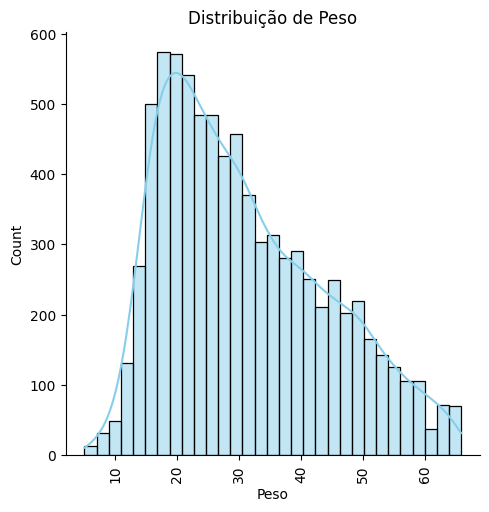

In [ ]:
sns.displot(df['Peso'], kde=True, color='skyblue')
plt.title("Distribuição de Peso")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('Peso')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

### Não será realizada transformação devido à distribuição

# Altura

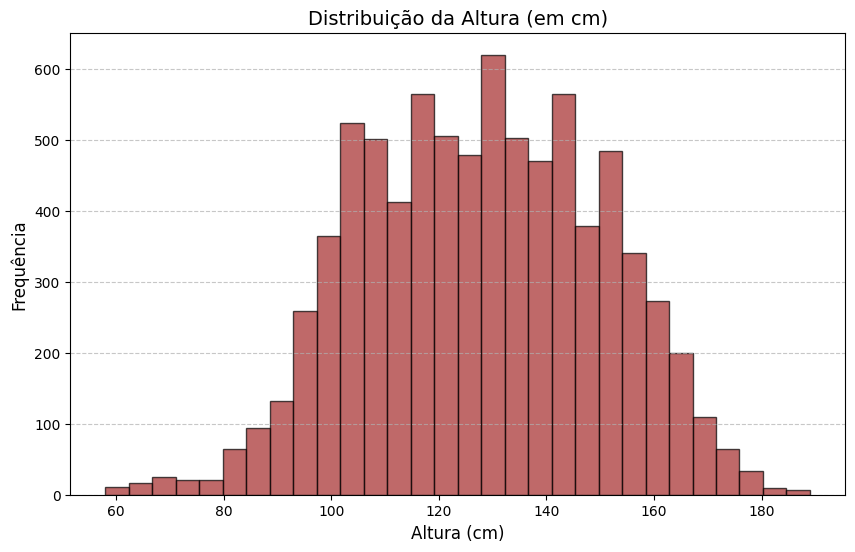

In [ ]:
# Criando um gráfico para analisar a distribuição da altura em centímetros
plt.figure(figsize=(10, 6))
plt.hist(df['Altura'].dropna(), bins=30, color='brown', edgecolor='black', alpha=0.7)

# Configurações do gráfico
plt.title('Distribuição da Altura (em cm)', fontsize=14)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(df['Altura'].dtypes)

float64


NÃO OCORRERÁ TRANSFORMAÇÃO

# IMC

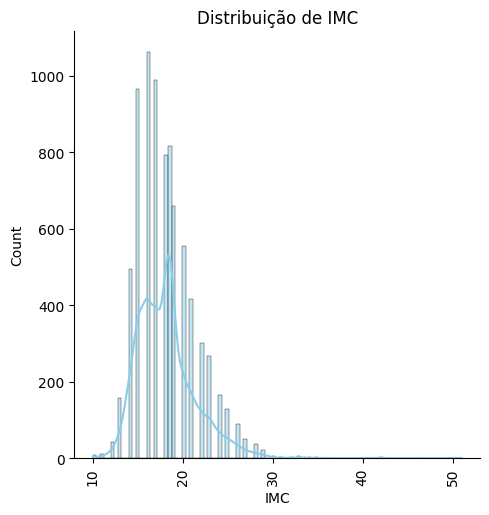

In [ ]:
sns.displot(df['IMC'], kde=True, color='skyblue')
plt.title("Distribuição de IMC")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('IMC')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['IMC'].dtypes)

float64


NÃO OCORRERÁ TRANSFORMAÇÃO

# Idade

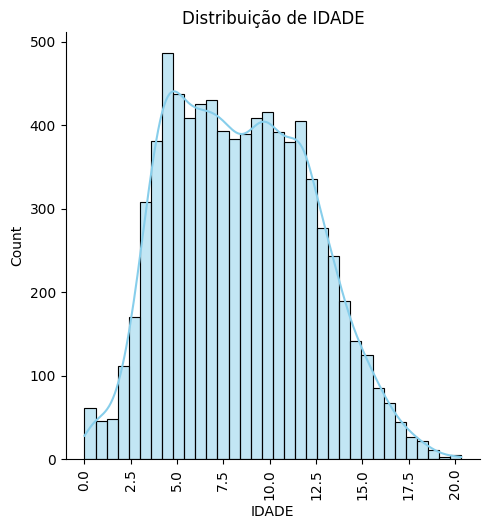

In [ ]:
sns.displot(df['IDADE'], kde=True, color='skyblue')
plt.title("Distribuição de IDADE")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('IDADE')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['IDADE'].dtypes)

float64


NÃO OCORRERÁ TRANSFORMAÇÃO

# Pulsos

In [ ]:
df['PULSOS'].unique()

array(['Normais', 'Outro', 'Femorais diminuidos', 'Amplos', 'Diminuídos '],
      dtype=object)

In [ ]:
contagens = df['PULSOS'].value_counts()

print(contagens)

PULSOS
Normais                8003
Outro                    25
Femorais diminuidos      10
Amplos                    7
Diminuídos                5
Name: count, dtype: int64


In [ ]:
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('PULSOS').size()

print(contagens_condicionais)

Series([], dtype: int64)


In [ ]:
df['PULSOS'] = df['PULSOS'].replace({
    'Femorais diminuidos': 'Alterados',
    'Diminuídos ': 'Alterados',
    'Amplos': 'Alterados',
    'Outros': 'Alterados'
})


In [ ]:
df['PULSOS'] = df['PULSOS'].apply(lambda x: 0 if x.strip().lower() == 'normais' else 1)

# Verificando a nova distribuição da coluna transformada
print(df['PULSOS'].value_counts())


PULSOS
0    8003
1      47
Name: count, dtype: int64


# PA Sistolica

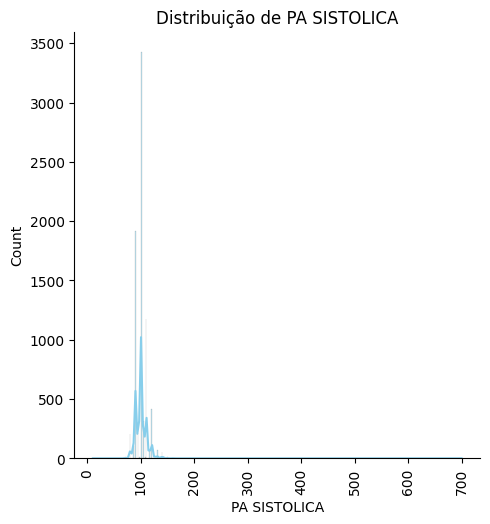

In [ ]:
sns.displot(df['PA SISTOLICA'], kde=True, color='skyblue')
plt.title("Distribuição de PA SISTOLICA")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('PA SISTOLICA')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['PA SISTOLICA'].dtypes)

float64


In [ ]:
valores_faltantes_por_coluna = df['PA SISTOLICA'].isna().sum()
print(f"Valores faltantes: {df['PA SISTOLICA'].isna().sum()}")

Valores faltantes: 1


In [ ]:
df = df.dropna(subset=['PA SISTOLICA'])

In [ ]:
df['PA SISTOLICA'] = df['PA SISTOLICA'].astype(int)

<ipython-input-23-f1f12e66f597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA SISTOLICA'] = df['PA SISTOLICA'].astype(int)


NÃO OCORRERÁ TRANSFORMAÇÃO

# PA Diastolica

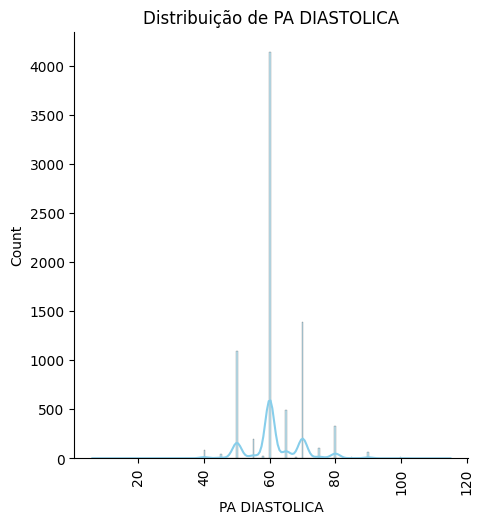

In [ ]:
sns.displot(df['PA DIASTOLICA'], kde=True, color='skyblue')
plt.title("Distribuição de PA DIASTOLICA")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('PA DIASTOLICA')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['PA DIASTOLICA'].dtypes)

float64


In [ ]:
valores_faltantes_por_coluna = df['PA DIASTOLICA'].isna().sum()
print(f"Valores faltantes: {df['PA DIASTOLICA'].isna().sum()}")

Valores faltantes: 6


In [ ]:
df = df.dropna(subset=['PA DIASTOLICA'])

In [ ]:
df['PA DIASTOLICA'] = df['PA DIASTOLICA'].astype(int)

<ipython-input-28-58a055ae61ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PA DIASTOLICA'] = df['PA DIASTOLICA'].astype(int)


NÃO OCORRERÁ TRANSFORMAÇÃO

# PPA

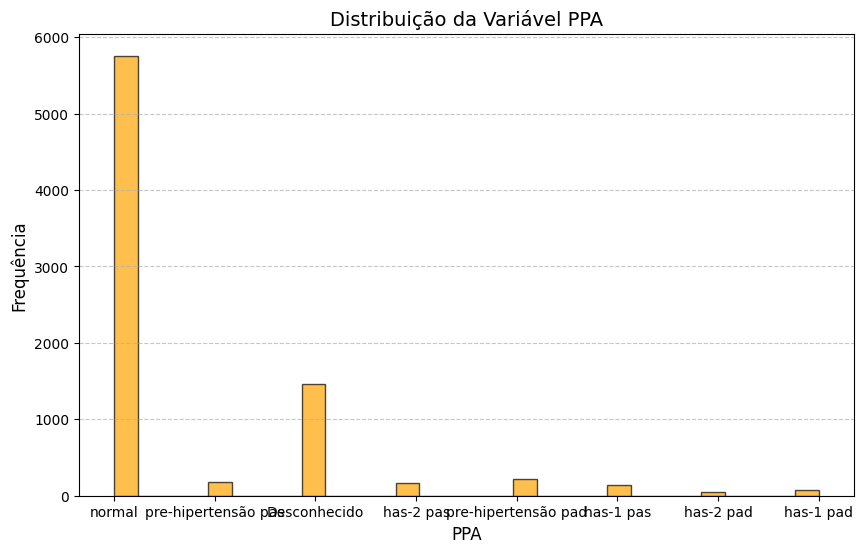

In [ ]:
# Verificando a distribuição da variável PPA
plt.figure(figsize=(10, 6))
plt.hist(df['PPA'].dropna(), bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Variável PPA', fontsize=14)
plt.xlabel('PPA', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df['PPA'].unique()

array(['normal', 'pre-hipertensão pas', 'Desconhecido', 'has-2 pas',
       'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad'],
      dtype=object)

In [ ]:
mapping = {
    'Desconhecido': 1,
    'normal': 2,
    'pre-hipertensão pad': 3,
    'pre-hipertensão pas': 4,
    'has-1 pad': 5,
    'has-1 pas': 6,
    'has-2 pad': 7,
    'has-2 pas': 8
}
df['PPA'] = df['PPA'].map(mapping)

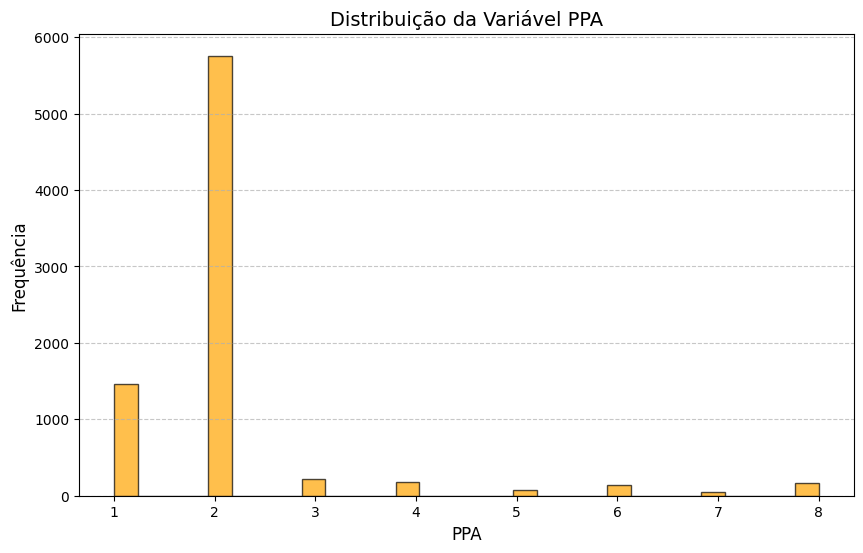

In [ ]:
# Verificando a distribuição da variável PPA
plt.figure(figsize=(10, 6))
plt.hist(df['PPA'].dropna(), bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Variável PPA', fontsize=14)
plt.xlabel('PPA', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Normal x Anormal

In [ ]:
df['NORMAL X ANORMAL'].unique()

array(['Anormal', 'Normal', 'Normais'], dtype=object)

In [ ]:
print(df['NORMAL X ANORMAL'].value_counts())

NORMAL X ANORMAL
Normal     5202
Anormal    2840
Normais       1
Name: count, dtype: int64


In [ ]:
valores_faltantes_por_coluna = df['NORMAL X ANORMAL'].isna().sum()
print(f"Valores faltantes: {df['NORMAL X ANORMAL'].isna().sum()}")


Valores faltantes: 0


In [ ]:
df['NORMAL X ANORMAL'] = df['NORMAL X ANORMAL'].replace({
    'Normais': 'Normal',
})


In [ ]:
print(df['NORMAL X ANORMAL'].value_counts())

NORMAL X ANORMAL
Normal     5203
Anormal    2840
Name: count, dtype: int64


In [ ]:
df['NORMAL X ANORMAL'] = df['NORMAL X ANORMAL'].replace({
    'Normal': 0,
    'Anormal': 1
})

print(df['NORMAL X ANORMAL'].value_counts())

NORMAL X ANORMAL
0    5203
1    2840
Name: count, dtype: int64


<ipython-input-38-9585eaf734dc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NORMAL X ANORMAL'] = df['NORMAL X ANORMAL'].replace({


In [ ]:
df= df.dropna(subset=['NORMAL X ANORMAL'])


In [ ]:
df['NORMAL X ANORMAL'] = df['NORMAL X ANORMAL'].astype(int)

In [ ]:
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,Normal,ausente,90.0,outro,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,Desdob fixo,ausente,100.0,Assintomático,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,Normal,ausente,80.0,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,Normal,sistólico,88.0,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,Normal,ausente,52.0,Assintomático,M,2 - Check-up,NaN


- Essa distribuição da variável target pode causar uma má generalização para o modelo ao aprender novos padrões, criando uma tendência a classe predominante.

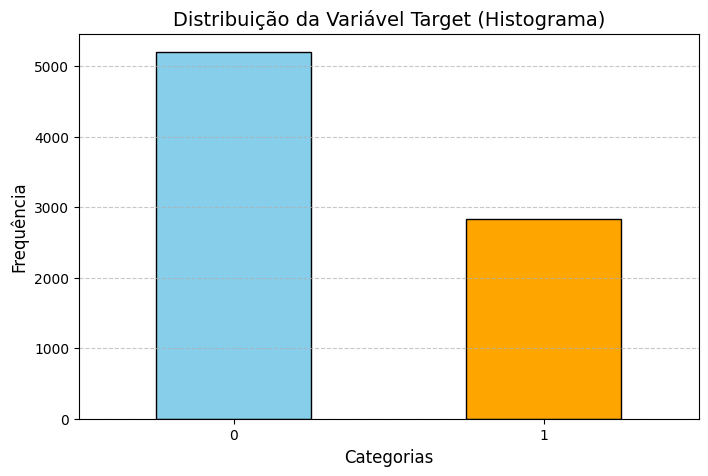

In [ ]:
df['NORMAL X ANORMAL'] = df['NORMAL X ANORMAL'].replace('Normais', 'Normal')

# Criando o gráfico de histograma
plt.figure(figsize=(8, 5))
df['NORMAL X ANORMAL'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Distribuição da Variável Target (Histograma)', fontsize=14)
plt.xlabel('Categorias', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# B2

In [ ]:
df['B2'].unique()

array(['Normal', 'Desdob fixo', 'Outro', 'Hiperfonética', 'Única'],
      dtype=object)

In [ ]:
df['B2'] = df['B2'].apply(lambda x: 'Normal' if x in ['Outro'] else x)

In [ ]:
contagens = df['B2'].value_counts()

print(contagens)

B2
Normal           7858
Hiperfonética      88
Desdob fixo        81
Única              16
Name: count, dtype: int64


In [ ]:
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('B2').size()

print(contagens_condicionais)

B2
Desdob fixo        69
Hiperfonética      86
Normal           2670
Única              15
dtype: int64


- Hiperfonética: 97.78%
- Única: 93.75%
- Desdob fixo: 85.19%
- Normal: 34.06%

In [ ]:
# Definindo a hierarquia das categorias
hierarchy = {
    'Normal': 1,
    'Desdob fixo': 2,
    'Única': 3,
    'Hiperfonética': 4
}

# Mapeando a hierarquia para o DataFrame
df['B2'] = df['B2'].map(hierarchy)
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,ausente,90.0,outro,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,ausente,100.0,Assintomático,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,ausente,80.0,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,sistólico,88.0,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,ausente,52.0,Assintomático,M,2 - Check-up,NaN


In [ ]:
contagens = df['B2'].value_counts()

print(contagens)

B2
1    7858
4      88
2      81
3      16
Name: count, dtype: int64


# Sopro

In [ ]:
df['SOPRO'].unique()

array(['ausente', 'sistólico', 'Sistólico', 'Contínuo', 'diastólico',
       'Sistolico e diastólico', 'contínuo'], dtype=object)

In [ ]:
df['SOPRO'] = df['SOPRO'].replace({'Sistólico': 'sistólico'})
df['SOPRO'] = df['SOPRO'].replace({'Contínuo': 'contínuo'})

In [ ]:
contagens = df['SOPRO'].value_counts()

print(contagens)

SOPRO
ausente                   5543
sistólico                 2481
contínuo                    11
diastólico                   7
Sistolico e diastólico       1
Name: count, dtype: int64


In [ ]:
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('SOPRO').size()

print(contagens_condicionais)

SOPRO
Sistolico e diastólico       1
ausente                    447
contínuo                     8
diastólico                   6
sistólico                 2378
dtype: int64


### Vamos excluir as que pouco se repetem para evitar enviesamento

In [ ]:
df['SOPRO'] = df['SOPRO'].apply(lambda x: 'ausente' if x in ['contínuo', 'diastólico', 'Sistolico e diastólico'] else x)

In [ ]:
contagens = df['SOPRO'].value_counts()

print(contagens)

SOPRO
ausente      5562
sistólico    2481
Name: count, dtype: int64


Label encoding

In [ ]:
label_encoder = LabelEncoder()

df['SOPRO'] = label_encoder.fit_transform(df['SOPRO'])

df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90.0,outro,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100.0,Assintomático,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80.0,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88.0,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52.0,Assintomático,M,2 - Check-up,NaN


In [ ]:
contagens = df['SOPRO'].value_counts()

print(contagens)

SOPRO
0    5562
1    2481
Name: count, dtype: int64


# FC

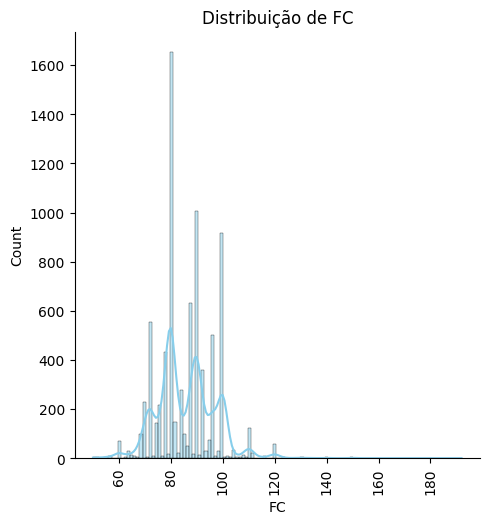

In [ ]:
sns.displot(df['FC'], kde=True, color='skyblue')
plt.title("Distribuição de FC")  # Mudando para título fixo ou usando df['Peso'] diretamente
plt.xlabel('FC')  # Usando nome fixo ou df['Peso'] se for variável
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(df['FC'].dtypes)

float64


In [ ]:
df['FC'] = df['FC'].astype(int)

NÃO OCORRERÁ TRANSFORMAÇÃO

# HDA 1

In [ ]:
df['HDA 1'].unique()

array(['outro', 'Assintomático', 'Desmaio/tontura', 'Dor precordial',
       'Outro', 'Palpitacao', 'Dispneia', 'Cianose', 'Ganho de peso'],
      dtype=object)

In [ ]:
df['HDA 1'] = df['HDA 1'].apply(lambda x: 'Normal' if x in ['Outro'] else x)

In [ ]:
contagens = df['HDA 1'].value_counts()

print(contagens)

HDA 1
Assintomático      4318
outro              1942
Dor precordial      593
Dispneia            378
Palpitacao          327
Desmaio/tontura     184
Normal              124
Ganho de peso       111
Cianose              66
Name: count, dtype: int64


- Ganho de peso: 45.05%
- Dispneia: 40.79%
- Assintomático: 39.38%
- Cianose: 43.28%
- Dor precordial: 33.41%
- Palpitação: 26.64%
- Desmaio/tontura: 21.20%
- Outro: 2.47%

In [ ]:
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('HDA 1').size()

print(contagens_condicionais)

HDA 1
Assintomático      1697
Cianose              28
Desmaio/tontura      39
Dispneia            153
Dor precordial      198
Ganho de peso        50
Normal               48
Palpitacao           87
outro               540
dtype: int64


In [ ]:
# Definindo a hierarquia das categorias
hierarchy = {
    'outro': 1,
    'Desmaio/tontura': 2,
    'Palpitacao': 3,
    'Dor precordial': 4,
    'Assintomático': 5,
    'Dispneia': 6,
    'Cianose': 7,
    'Ganho de peso': 8
}


# Mapeando a hierarquia para o DataFrame
df['HDA 1'] = df['HDA 1'].map(hierarchy)
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1.0,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5.0,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5.0,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5.0,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5.0,M,2 - Check-up,NaN


In [ ]:
contagens = df['HDA 1'].value_counts()

print(contagens)

HDA 1
5.0    4318
1.0    1942
4.0     593
6.0     378
3.0     327
2.0     184
8.0     111
7.0      66
Name: count, dtype: int64


In [ ]:
valores_faltantes_por_coluna = df['HDA 1'].isna().sum()
print(f"Valores faltantes: {df['HDA 1'].isna().sum()}")


Valores faltantes: 124


In [ ]:
if df['HDA 1'].isna().sum() > 0:
    df['HDA 1'] = df['HDA 1'].fillna(0)

In [ ]:
df['HDA 1'] = df['HDA 1'].astype(int)
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,M,5 - Parecer cardiológico,5 - Atividade física
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,M,2 - Check-up,NaN
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,F,5 - Parecer cardiológico,5 - Cirurgia
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,M,5 - Parecer cardiológico,5 - Cirurgia
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,M,2 - Check-up,NaN


# Sexo

In [ ]:
df['SEXO'].unique()

array(['M', 'F', 'Indeterminado'], dtype=object)

### Utilizando uma função que criará 3 colunas com flags para indicar o sexo

In [ ]:
df = pd.get_dummies(df, columns=['SEXO'], drop_first=False)


In [ ]:
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,5 - Parecer cardiológico,5 - Atividade física,False,False,True
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,2 - Check-up,NaN,False,False,True
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,5 - Parecer cardiológico,5 - Cirurgia,True,False,False
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,5 - Parecer cardiológico,5 - Cirurgia,False,False,True
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,2 - Check-up,NaN,False,False,True


In [ ]:
df[['SEXO_M', 'SEXO_F', 'SEXO_Indeterminado']] = df[['SEXO_M', 'SEXO_F', 'SEXO_Indeterminado']].astype(int)

In [ ]:
df.head(10)

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,5 - Parecer cardiológico,5 - Atividade física,0,0,1
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,2 - Check-up,NaN,0,0,1
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,5 - Parecer cardiológico,5 - Cirurgia,1,0,0
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,5 - Parecer cardiológico,5 - Cirurgia,0,0,1
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,2 - Check-up,NaN,0,0,1
5,10.5,89.000000,13.0,2.72,0,90,60,2,0,1,0,95,5,5 - Parecer cardiológico,5 - Cirurgia,1,0,0
6,47.0,145.000000,22.0,11.17,0,110,60,2,1,1,1,80,2,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,1,0,0
7,52.0,155.000000,22.0,17.26,0,140,90,8,1,1,0,70,4,5 - Parecer cardiológico,NaN,1,0,0
8,45.0,155.962573,18.5,15.86,0,105,70,1,0,1,0,78,2,5 - Parecer cardiológico,NaN,0,0,1
9,28.0,133.000000,16.0,8.43,0,140,100,8,1,1,1,100,0,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,0,0,1


# Motivo 1

### Checando os valores de Motivo 1

In [ ]:
df['MOTIVO1'].unique()

array(['5 - Parecer cardiológico', '2 - Check-up',
       '6 - Suspeita de cardiopatia', 'Outro',
       '1 - Cardiopatia já estabelecida', '7 - Outro'], dtype=object)

In [ ]:
df['MOTIVO1'] = df['MOTIVO1'].replace({'Outro': '7 - Outro'})

In [ ]:
df['MOTIVO1'].unique()

array(['5 - Parecer cardiológico', '2 - Check-up',
       '6 - Suspeita de cardiopatia', '7 - Outro',
       '1 - Cardiopatia já estabelecida'], dtype=object)

### Vendo a correlação entre MOTIVO 1  e a alvo

In [ ]:
contagens = df['MOTIVO1'].value_counts()

print(contagens)

MOTIVO1
5 - Parecer cardiológico           4225
6 - Suspeita de cardiopatia        2493
2 - Check-up                        566
1 - Cardiopatia já estabelecida     484
7 - Outro                           275
Name: count, dtype: int64


In [ ]:
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('MOTIVO1').size()

print(contagens_condicionais)

MOTIVO1
1 - Cardiopatia já estabelecida     312
2 - Check-up                        141
5 - Parecer cardiológico           1079
6 - Suspeita de cardiopatia        1201
7 - Outro                           107
dtype: int64


**Relacionamentos 'MOTIVO1'**
 - Cardiopatia já estabelecida: 68.84%
 - Suspeita de cardiopatia: 48.27%
 - Outro: 39.35%
 - Check-up: 25.59%
 - Parecer cardiológico: 24.87%


### Aplicar mapeamento (hierárquico) baseado nas porcentagens

In [ ]:


# Definindo a hierarquia das categorias
hierarchy = {
    '7 - Outro': 1,
    '5 - Parecer cardiológico': 2,
    '2 - Check-up': 3,
    '6 - Suspeita de cardiopatia': 4,
    '1 - Cardiopatia já estabelecida': 5
}

# Mapeando a hierarquia para o DataFrame
df['MOTIVO1'] = df['MOTIVO1'].map(hierarchy)
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,2,5 - Atividade física,0,0,1
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,3,NaN,0,0,1
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,2,5 - Cirurgia,1,0,0
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,2,5 - Cirurgia,0,0,1
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,3,NaN,0,0,1


# Motivo 2

### Checando os valores de Motivo 2

In [ ]:
df['MOTIVO2'].unique()

array(['5 - Atividade física', nan, '5 - Cirurgia',
       '6 - Palpitação/taquicardia/arritmia',
       '6 - HAS/dislipidemia/obesidade', '6 - Sopro', 'Outro',
       '1 - Cardiopatia congenica', '6 - Alterações de pulso/perfusão',
       '6 - Dor precordial', '6 - Dispnéia', '6 - Cansaço',
       '1 - Cardiopatia adquirida', '6 - Cardiopatia na familia',
       '6 - Cianose', '6 - Cianose e dispnéia', '5 - Uso de cisaprida'],
      dtype=object)

In [ ]:
df['MOTIVO2'] = df['MOTIVO2'].fillna('Outro')

In [ ]:
df['MOTIVO2'].unique()

array(['5 - Atividade física', 'Outro', '5 - Cirurgia',
       '6 - Palpitação/taquicardia/arritmia',
       '6 - HAS/dislipidemia/obesidade', '6 - Sopro',
       '1 - Cardiopatia congenica', '6 - Alterações de pulso/perfusão',
       '6 - Dor precordial', '6 - Dispnéia', '6 - Cansaço',
       '1 - Cardiopatia adquirida', '6 - Cardiopatia na familia',
       '6 - Cianose', '6 - Cianose e dispnéia', '5 - Uso de cisaprida'],
      dtype=object)

### Vendo a correlação entre MOTIVO 2 e a alvo

In [ ]:
contagens = df['MOTIVO2'].value_counts()

print(contagens)

MOTIVO2
Outro                                  2554
5 - Cirurgia                           2036
6 - Sopro                              1010
5 - Atividade física                    752
6 - Dor precordial                      427
1 - Cardiopatia congenica               389
6 - Palpitação/taquicardia/arritmia     284
6 - HAS/dislipidemia/obesidade          273
6 - Dispnéia                            157
1 - Cardiopatia adquirida                85
6 - Cianose                              37
6 - Cardiopatia na familia               22
6 - Cansaço                              14
6 - Alterações de pulso/perfusão          1
6 - Cianose e dispnéia                    1
5 - Uso de cisaprida                      1
Name: count, dtype: int64


In [ ]:
# Aplicar a condição para a outra coluna e contar categorias na coluna de interesse
contagens_condicionais = df[df['NORMAL X ANORMAL'] == 1.0].groupby('MOTIVO2').size()

print(contagens_condicionais)


MOTIVO2
1 - Cardiopatia adquirida               37
1 - Cardiopatia congenica              270
5 - Atividade física                   200
5 - Cirurgia                           551
5 - Uso de cisaprida                     1
6 - Alterações de pulso/perfusão         1
6 - Cansaço                              8
6 - Cardiopatia na familia               7
6 - Cianose                             14
6 - Dispnéia                            45
6 - Dor precordial                     124
6 - HAS/dislipidemia/obesidade          83
6 - Palpitação/taquicardia/arritmia    104
6 - Sopro                              729
Outro                                  666
dtype: int64


**Portanto, a % de cada categoria de 'MOTIVO2' presente quando há a patologia é:**

- Sopro: 73.67%
- Cardiopatia congênita: 71.39%
- Uso de cisaprida: 66.67%
- Cansaço: 50.00%
- Cardiopatia adquirida: 47.37%
- Outro: 40.38%
- Alterações de pulso/perfusão: 40.00%
- Cianose: 39.76%
- Palpitação/taquicardia/arritmia: 35.98%
- Dispnéia: 33.13%
- HAS/dislipidemia/obesidade: 30.42%
- Dor precordial: 28.15%
- Atividade física: 25.33%
- Cirurgia: 23.67%
- Cardiopatia na família: 24.53%
- Cianose e dispnéia: 20.00%



### Aplicar mapeamento (hierárquico) baseado nas porcentagens

In [ ]:
df.fillna({'MOTIVO2': "Outro"}, inplace=True)
# Definindo a hierarquia das categorias
hierarchy = {
    'Outro': 0,
    '6 - Cianose e dispnéia': 1,
    '6 - Cardiopatia na familia': 2,
    '5 - Cirurgia': 3,
    '5 - Atividade física': 4,
    '6 - Dor precordial': 5,
    '6 - HAS/dislipidemia/obesidade': 6,
    '6 - Dispnéia': 7,
    '6 - Palpitação/taquicardia/arritmia': 8,
    '6 - Cianose': 9,
    '6 - Alterações de pulso/perfusão': 10,
    '1 - Cardiopatia adquirida': 12,
    '6 - Cansaço': 13,
    '5 - Uso de cisaprida': 14,
    '1 - Cardiopatia congenica': 15,
    '6 - Sopro': 16
}


# Mapeando a hierarquia para o DataFrame
df['MOTIVO2'] = df['MOTIVO2'].map(hierarchy)



df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,MOTIVO1,MOTIVO2,SEXO_F,SEXO_Indeterminado,SEXO_M
0,39.5,142.000000,20.0,9.60,0,85,50,2,1,1,0,90,1,2,4,0,0,1
1,26.0,112.000000,21.0,4.40,0,100,60,2,1,2,0,100,5,3,0,0,0,1
2,28.0,117.000000,20.0,5.89,0,110,65,4,1,1,0,80,5,2,3,1,0,0
3,24.5,122.000000,16.0,6.24,0,100,65,2,1,1,1,88,5,2,3,0,0,1
4,42.0,150.674161,18.5,15.50,0,100,60,1,0,1,0,52,5,3,0,0,0,1


# Exportando dataset transformado

In [ ]:
df.to_csv('UCMF_FINAL.csv', index=False)
from google.colab import files
files.download('UCMF_FINAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>